In [79]:
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
# To save models
import math
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [80]:
df = pd.read_csv("/workspaces/betaniammc-machine-learning/data/processed/df_diabetes")

## modelo del modelo 1

In [81]:
# Dividimos el conjunto de datos en muestras de train y test
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

# Instancia de: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

In [82]:
model = DecisionTreeClassifier(max_depth = 5, random_state = 42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Una vez que el modelo se ha entrenado correctamente, podemos visualizar el árbol con la misma librería. Esta visualización representa todos los pasos que ha seguido el modelo hasta la construcción del árbol. Además, se hace por niveles y de izquierda a derecha:

### visualizacion del arbol

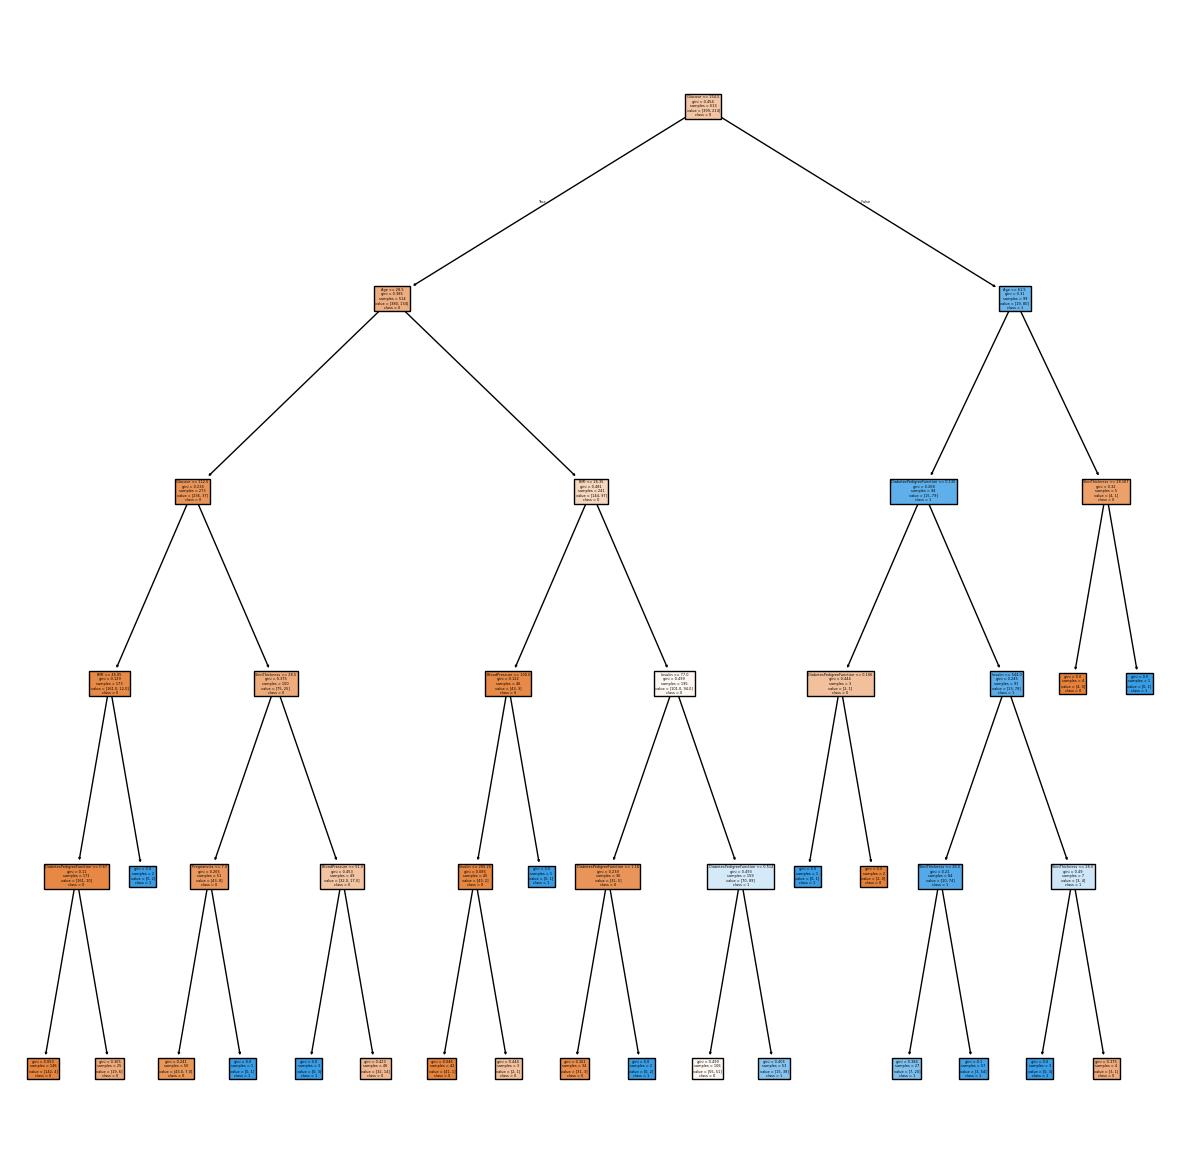

In [83]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

### Predicción del modelo

Una vez se ha entrenado el modelo, se puede utilizar para predecir con el conjunto de datos de prueba.

In [84]:
y_pred_test = model.predict(X_test)


In [85]:
y_pred_train = model.predict(X_train)


Con los datos en crudo es muy complicado saber si el modelo está acertando o no. Para ello, debemos compararlo con la realidad. Existe una gran cantidad de métricas para medir la efectividad de un modelo a la hora de predecir, entre ellas la precisión (accuracy), que es la fracción de predicciones que el modelo realizó correctamente.

In [86]:
accuracy_score(y_test, y_pred_test)

0.7597402597402597

In [87]:
accuracy_score(y_train, y_pred_train)

0.8156606851549756

In [88]:
# Definimos los parámetros que queremos ajustar a mano
hyperparams = { 'max_depth': [4, 5, 6,7],
                'min_samples_split': [2, 5,8 , 10],
                'min_samples_leaf': [1, 2, 4]}



# Inicializamos la cuadrícula
grid_diabetes = GridSearchCV(DecisionTreeClassifier(random_state=18),
                    hyperparams,
                    cv=5,
                    n_jobs=-1,
                    verbose=1)
grid_diabetes.fit(X_train, y_train)

grid_diabetes.best_params_  

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [89]:
model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=2, random_state=42)
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

y_pred_train = model.predict(X_train)

accuracy_score(y_test, y_pred_test), accuracy_score(y_train, y_pred_train)

(0.7597402597402597, 0.8091353996737357)

In [90]:
with open("/workspaces/betaniammc-machine-learning/models/diabetes_decitions_model.pkl", "wb") as file:
    pickle.dump(model, file)